In [79]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sr
import sklearn.neighbors as sk
import random


%matplotlib inline


In [80]:
## import csv file

train_df = pd.read_csv(r'Landsat_Soil_Data/Soil_train_dataset.csv', header=None)
test_df = pd.read_csv(r'Landsat_Soil_Data/Soil_test_dataset.csv', header=None)


In [58]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
1,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
2,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
3,80,94,98,76,80,102,102,79,76,102,...,79,79,107,109,87,79,107,109,87,3
4,76,102,106,83,76,102,106,87,80,98,...,87,79,103,104,83,79,103,104,79,3


In [59]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [85]:
train_X = train_df.loc[:, 16:19]
train_Y = train_df.loc[:, 36]

data = pd.concat([train_X, train_Y], axis=1)
data.columns = ['b1', 'b2', 'b3', 'b4', 'soil_type']

In [61]:
test_X = test_df.loc[:, 16:19]
test_Y = test_df.loc[:, 36]
test_data = pd.concat([test_X, test_Y], axis=1)
test_data.columns = ['b1', 'b2', 'b3', 'b4', 'soil_type']

In [62]:
# About data
soil_type = ['1', '2', '3', '4', '5', '7']
bands = ['b1', 'b2', 'b3', 'b4']
'''
Number Class
1 red soil
2 cotton crop
3 grey soil
4 damp grey soil
5 soil with vegetation stubble
6 mixture class (all types present)
7 very damp grey soil

NB. There are no examples with class 6 in this dataset.
'''

'\nNumber Class\n1 red soil\n2 cotton crop\n3 grey soil\n4 damp grey soil\n5 soil with vegetation stubble\n6 mixture class (all types present)\n7 very damp grey soil\n\nNB. There are no examples with class 6 in this dataset.\n'

# Exploration Data 

In [63]:
data.head()

,b1,b2,b3,b4,soil_type
0,84,99,104,78,3
1,84,99,104,81,3
2,76,99,104,81,3
3,76,99,108,85,3
4,80,112,118,88,3


In [64]:
data.tail()

,b1,b2,b3,b4,soil_type
4428,67,87,113,96,5
4429,67,95,109,92,5
4430,75,99,104,83,4
4431,75,95,100,79,4
4432,71,91,100,83,4


In [65]:
print(data.shape)

(4433, 5)


In [66]:
#Summary of data
print(data.describe())

                b1           b2           b3           b4    soil_type
count  4433.000000  4433.000000  4433.000000  4433.000000  4433.000000
mean     69.118204    83.422964    99.236634    82.617415     3.650575
std      13.558072    22.816911    16.727717    18.848096     2.217512
min      40.000000    27.000000    56.000000    34.000000     1.000000
25%      60.000000    71.000000    85.000000    69.000000     2.000000
50%      68.000000    85.000000   101.000000    81.000000     3.000000
75%      79.000000   103.000000   113.000000    92.000000     5.000000
max     104.000000   130.000000   139.000000   157.000000     7.000000


In [67]:
print(data.nunique())  # imp to remove outliers and clean data

b1           49
b2           79
b3           72
b4           99
soil_type     6
dtype: int64


In [68]:
#group by soiltype - aggregation
data['soil_type'].value_counts()
# soil-type value counts

1    1072
7    1038
3     959
2     479
5     470
4     415
Name: soil_type, dtype: int64

In [69]:
soil_grp = data.groupby(['soil_type'])

In [70]:
data.groupby(['soil_type'])

In [71]:
a = soil_grp.describe()
a

b1                                                          b2  \
            count       mean       std   min   25%   50%   75%    max   count   
soil_type                                                                       
1          1072.0  62.825560  8.021469  46.0  57.0  63.0  68.0   97.0  1072.0   
2           479.0  48.839248  7.570674  40.0  44.0  46.0  50.0   78.0   479.0   
3           959.0  87.477581  5.041505  70.0  84.0  88.0  92.0  104.0   959.0   
4           415.0  77.409639  5.543931  64.0  74.0  78.0  82.0   92.0   415.0   
5           470.0  59.589362  6.087449  44.0  56.0  59.0  63.0   82.0   470.0   
7          1038.0  69.012524  5.382105  52.0  66.0  68.0  71.0   88.0  1038.0   

                       ...      b3             b4                         \
                 mean  ...     75%    max   count        mean        std   
soil_type              ...                                                 
1           95.293843  ...  118.25  135.0  1072.0   88.600746   8.824099   
2           39.914405  ...  124.00  139.0   479.0  118.311065  19.293952   
3          105.494265  ...  114.00  139.0   959.0   87.466111   6.049263   
4           90.944578  ...  100.00  119.0   415.0   75.354217   6.532884   
5           62.265957  ...   89.00  122.0   470.0   69.953191  13.125357   
7           77.421965  ...   86.00  114.0  1038.0   64.125241   7.361824   

                                             
            min    25%    50%    75%    max  
soil_type                                    
1          65.0   81.0   90.0   96.0  104.0  
2          67.0  105.0  122.0  133.0  157.0  
3          59.0   83.0   87.0   92.0  109.0  
4          59.0   70.0   75.0   79.0   94.0  
5          34.0   61.0   70.0   78.0  100.0  
7          48.0   58.0   63.0   68.0   90.0  

[6 rows x 32 columns]

In [87]:
a['b4'].iloc[1]

count    479.000000
mean     118.311065
std       19.293952
min       67.000000
25%      105.000000
50%      122.000000
75%      133.000000
max      157.000000
Name: 2, dtype: float64

In [ ]:
b1t= soil_grp['b1'].agg(['std'])
b2t=soil_grp['b2'].agg([ 'std'])
b3t=soil_grp['b3'].agg(['std'])
b4t=soil_grp['b4'].agg(['std'])
b5t=soil_grp['b4'].agg(['std'])
b7t=soil_grp['b4'].agg(['std'])

In [ ]:
mean = pd.concat([b1t, b2t, b3t, b4t], axis=1)
print(mean[1:2])

                std        std        std        std
soil_type                                           
2          7.570674  13.483252  12.641098  19.293952


In [ ]:
np.array(mean[5:])

array([[5.38210517, 7.68705528, 8.74169237, 7.36182383]])

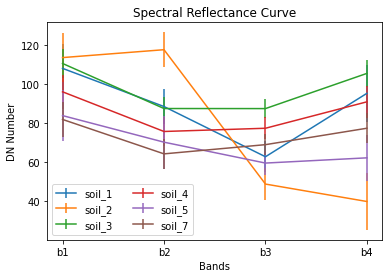

In [ ]:
# Spectral Signature plot
index= ['b1', 'b2', 'b3', 'b4']
soil_1= [108.07089552,  88.52425373,  62.8255597 ,  95.29384328]
dev1= [12.7236156 ,  8.937242  ,  8.02146861, 14.54823714]
soil_2= [113.58455115, 117.62421712,  48.83924843,  39.91440501]
dev2=[12.7236156 ,  8.937242  ,  8.02146861, 14.54823714]
soil_3= [110.58081335,  87.51303441,  87.47758081, 105.49426486]
dev3 =[7.55795195, 6.01698944, 5.04150498, 6.86917097]
soil_4= [96.0746988 , 75.75662651, 77.40963855, 90.94457831]
dev4=[8.62793524, 7.29045754, 5.54393115, 8.15871031]
soil_5= [83.89148936, 70.28297872, 59.5893617 , 62.26595745]
dev5= [13.00020223, 13.65469403,  6.08744852, 11.63735579]
soil_7= [81.92581888, 64.30154143, 69.01252408, 77.42196532]
dev7 =[9.14278085, 7.64866276, 5.38210517, 7.68705528]

plt.errorbar(index ,soil_1, dev1, label='soil_1')
plt.errorbar(index ,soil_2, dev2, label='soil_2')
plt.errorbar(index ,soil_3, dev3, label='soil_3')
plt.errorbar(index ,soil_4, dev4, label='soil_4')
plt.errorbar(index ,soil_5, dev5, label='soil_5')
plt.errorbar(index ,soil_7, dev7, label='soil_7')
plt.legend(loc='best', ncol=2)
plt.xlabel("Bands")
plt.ylabel("DN Number")
plt.title("Spectral Reflectance Curve")
plt.show()


# Data Visualization

Text(0, 0.5, 'Frequency')

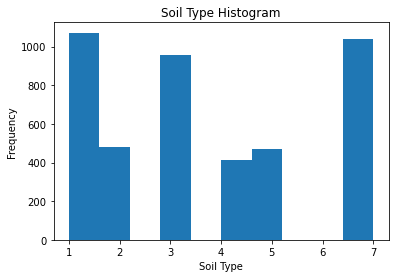

In [22]:
plt.hist(data['soil_type'])
plt.title("Soil Type Histogram")
plt.xlabel("Soil Type")
plt.ylabel("Frequency")

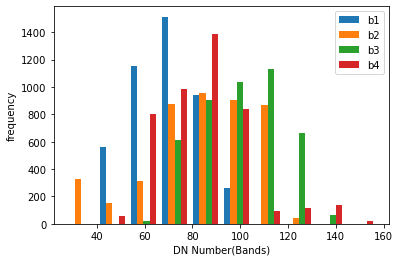

In [20]:
# Histogram Visualization

plt.hist([data['b1'], data['b2'], data['b3'], data['b4']], label=['b1', 'b2','b3', 'b4'])
plt.xlabel("DN Number(Bands)")
plt.ylabel("frequency")
plt.legend()


<AxesSubplot:xlabel='soil_type', ylabel='b4'>

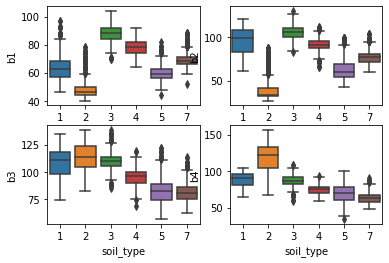

In [88]:
# Box Plot soil type and band wise
# check for outliers
#g = plt.figure()

plt.subplot(2,2,1)
sr.boxplot(x = 'soil_type', y = 'b1', data=data)

plt.subplot(2,2,2)
sr.boxplot(x = 'soil_type', y = 'b2', data=data)

plt.subplot(2,2,3)
sr.boxplot(x = 'soil_type', y = 'b3', data=data)

plt.subplot(2,2,4)
sr.boxplot(x = 'soil_type', y = 'b4', data=data)



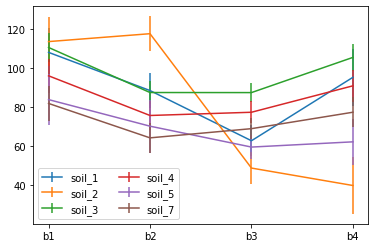

In [363]:
plt.errorbar(index ,soil_1, dev1, label='soil_1')
plt.errorbar(index ,soil_2, dev2, label='soil_2')
plt.errorbar(index ,soil_3, dev3, label='soil_3')
plt.errorbar(index ,soil_4, dev4, label='soil_4')
plt.errorbar(index ,soil_5, dev5, label='soil_5')
plt.errorbar(index ,soil_7, dev7, label='soil_7')
plt.legend(loc='best', ncol=2)
plt.show()


In [ ]:
# Outliers


<IPython.core.display.Javascript object>


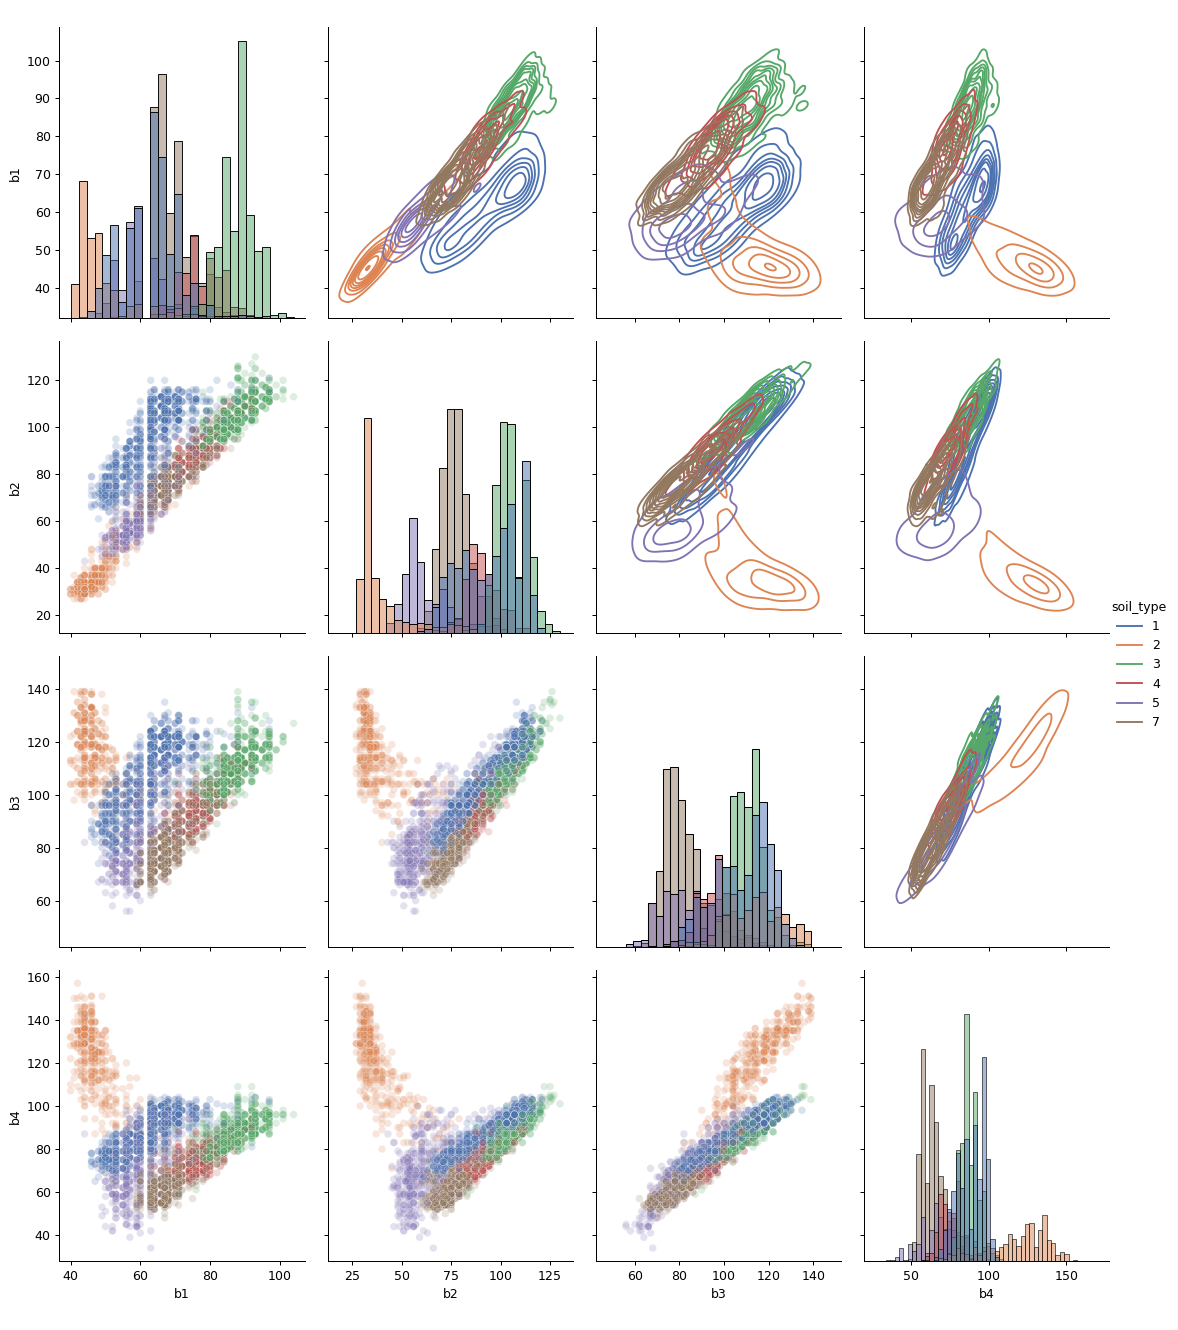

Text(0.5, 1.08, 'Your Title')

In [118]:
# Pair_grid
pg = sr.PairGrid(data, hue='soil_type', diag_sharey=True,palette="deep", height=3.0 , aspect=1.2)
#pg.map(sr.scatterplot)
#pg.map_offdiag(sr.scatterplot)
pg.map_diag(sr.histplot, )
pg.map_lower(sr.scatterplot, alpha=0.2)
pg.map_upper(sr.kdeplot)
#pg.map_diag(sr.boxplot)
pg.add_legend()
pg.fig.suptitle("Your Title", y=1.08)

<IPython.core.display.Javascript object>


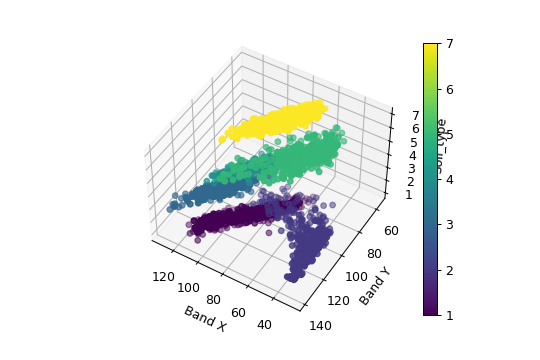

In [28]:
# 3D Plot
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
plot3d = ax.scatter3D(data.b2, data.b3, data.soil_type, c=data.soil_type)
ax.set_xlabel('Band X')
ax.set_ylabel('Band Y')
ax.set_zlabel('Soil_type')

plt.colorbar(plot3d)
# angles in degrees

In [ ]:
#From exploring plots it can be observed that soil tyep 4 will be hard to classify 
# a linear model can work with multiple linear decision boundries

# 3 Outlier Removal

In [9]:
## import csv file

train_df = pd.read_csv(r'C:\Users\Abhishek\Desktop\soil_train_data_Raw.csv', header=None)
test_df = pd.read_csv(r'C:\Users\Abhishek\Desktop\soil_test_data_Raw.csv', header=None)

train_X = train_df.loc[:, 16:19]

train_Y = train_df.loc[:, 36]

data = pd.concat([train_X, train_Y], axis=1)
data.columns = ['b1', 'b2', 'b3', 'b4', 'soil_type']

<IPython.core.display.Javascript object>


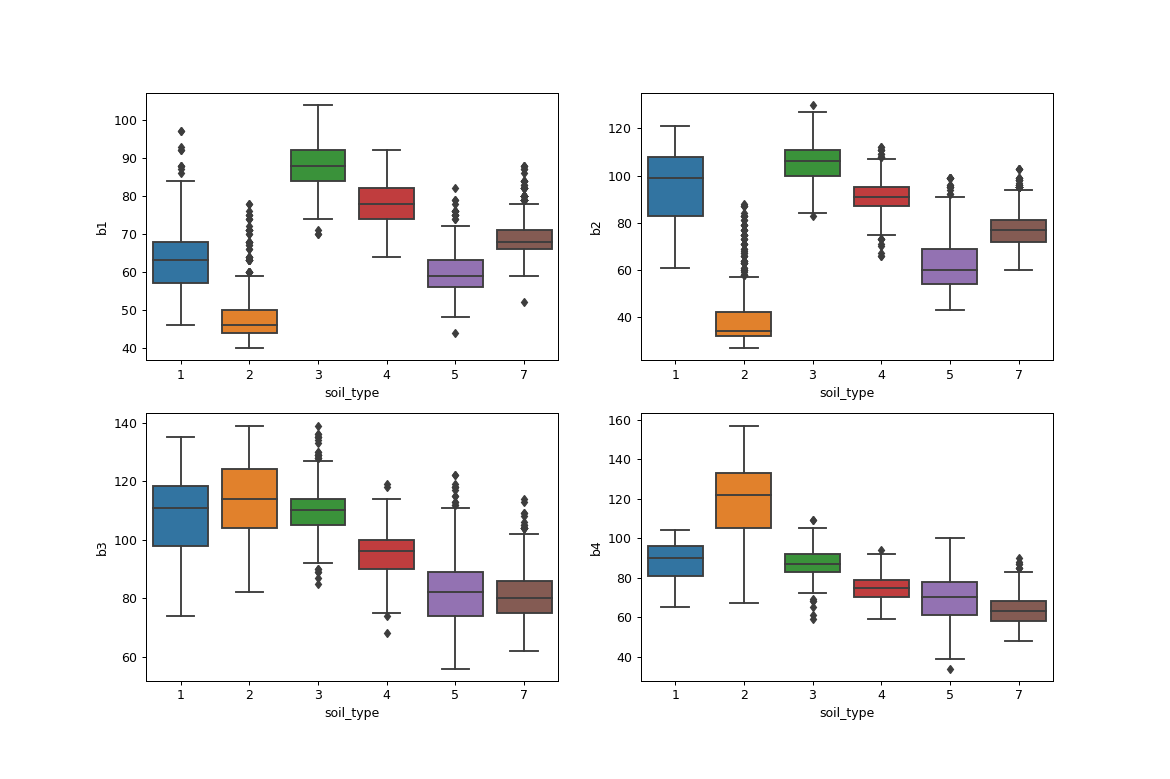

<AxesSubplot:xlabel='soil_type', ylabel='b4'>

In [175]:
# Box Plot soil type and band wise
# check for outliers
f = plt.figure()

plt.subplot(2,2, 1)
sr.boxplot(x = 'soil_type', y = 'b1', data=data)

plt.subplot(2, 2, 2)
sr.boxplot(x = 'soil_type', y = 'b2', data=data)

plt.subplot(2, 2, 3)
sr.boxplot(x = 'soil_type', y = 'b3', data=data)

plt.subplot(2, 2, 4)
sr.boxplot(x = 'soil_type', y = 'b4', data=data)


In [11]:
def bound(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    median = df.median()
    std_dev = df.std()
    
    lower_bound = Q1 - (1.0*IQR)
    upper_bound = Q3 + (1.0*IQR)
    
    #lower_bound = median - (1*std_dev)
    #upper_bound = median + (1*std_dev)
    
    return(lower_bound, upper_bound)

In [121]:

grp = data.groupby(['soil_type'])

soil1 = grp.get_group(1)
soil2 = grp.get_group(2)
soil3 = grp.get_group(3)
soil4 = grp.get_group(4)
soil5 = grp.get_group(5)
soil7 = grp.get_group(7)
    

In [35]:
soil1.describe()

,b1,b2,b3,b4,soil_type
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.0
mean,108.070896,88.524254,62.825560,95.293843,1.0
std,12.723616,8.937242,8.021469,14.548237,0.0
min,76.000000,65.000000,46.000000,61.000000,1.0
25%,98.000000,81.000000,57.000000,83.000000,1.0
50%,111.000000,90.000000,63.000000,99.000000,1.0
75%,119.000000,96.000000,68.000000,108.000000,1.0
max,135.000000,104.000000,97.000000,121.000000,1.0


In [9]:
'''
bands = ['b1', 'b2', 'b3', 'b4']
idx_ls = []
for band in bands:
    
    for i in [soil1, soil2, soil3, soil4, soil5, soil7]:

        lower_bound, upper_bound = bound(i[band])
        

        for j in range(len(i)):
            if ((data.iloc[i.index[j]][band] < lower_bound) or (data.iloc[i.index[j]][band] > upper_bound)):
                idx_ls.append(data.iloc[i.index[j]].name)
                
'''

"\nbands = ['b1', 'b2', 'b3', 'b4']\nidx_ls = []\nfor band in bands:\n    \n    for i in [soil1, soil2, soil3, soil4, soil5, soil7]:\n\n        lower_bound, upper_bound = bound(i[band])\n        \n\n        for j in range(len(i)):\n            if ((data.iloc[i.index[j]][band] < lower_bound) or (data.iloc[i.index[j]][band] > upper_bound)):\n                idx_ls.append(data.iloc[i.index[j]].name)\n                \n"

In [12]:
a,b = data.shape
ls = []
for i in range(a):
    type = data.iloc[i,4]
    b1 = data.iloc[i,0]
    b2 = data.iloc[i,1]
    b3 = data.iloc[i,2]
    b4 = data.iloc[i,3]
    
    l1, u1 = bound(data.groupby(['soil_type']).get_group(type)['b1'])
    l2, u2 = bound(data.groupby(['soil_type']).get_group(type)['b2'])
    l3, u3 = bound(data.groupby(['soil_type']).get_group(type)['b3'])
    l4, u4 = bound(data.groupby(['soil_type']).get_group(type)['b4'])
    
    if(b1<l1 or b2<l2 or b3 < l3 or b4<l4 or b1>u1 or b2>u2 or b3>u3 or b4>u4):
        ls.append(i)

In [13]:
data = data.drop(ls)

In [144]:
data.shape

(3966, 5)

In [145]:
clean_data = data

In [146]:
nd = pd.DataFrame(clean_data)
#nd.to_csv('D:\8th Sem\AI for Engieers\clean_trainData.csv', index=False)

<IPython.core.display.Javascript object>


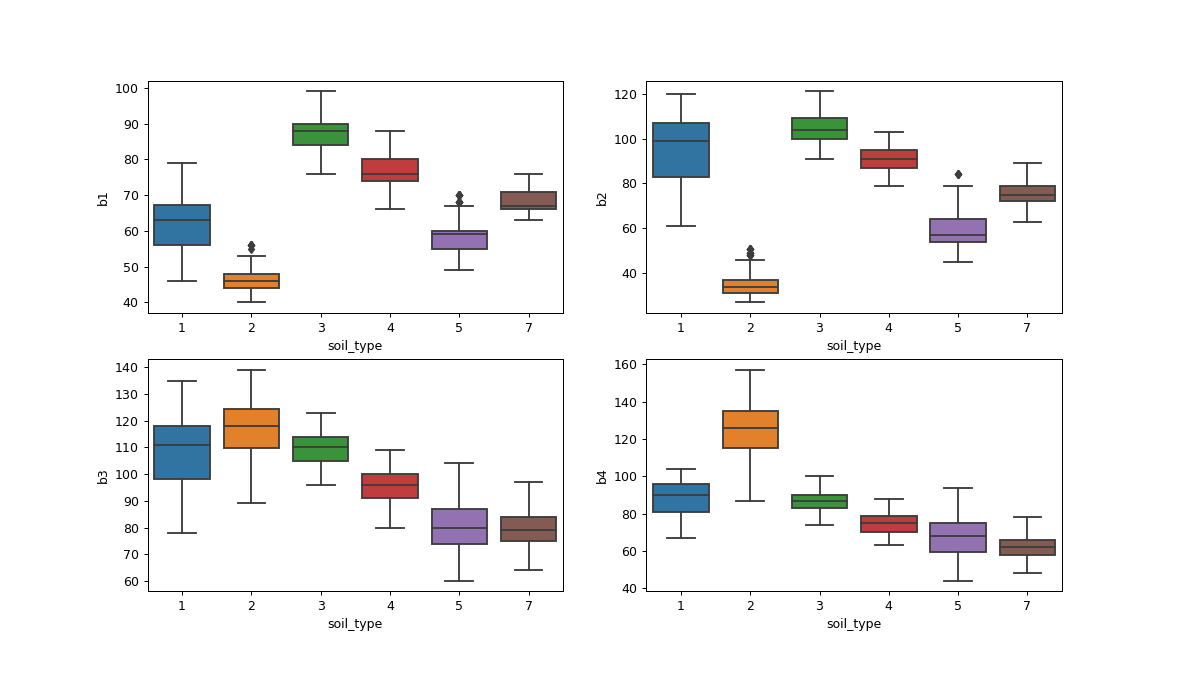

<AxesSubplot:xlabel='soil_type', ylabel='b4'>

In [147]:
new = data
fig = plt.figure()
plt.subplot(2,2, 1)
sr.boxplot(x = 'soil_type', y = 'b1', data=new)

plt.subplot(2, 2, 2)
sr.boxplot(x = 'soil_type', y = 'b2', data=new)

plt.subplot(2, 2, 3)
sr.boxplot(x = 'soil_type', y = 'b3', data=new)

plt.subplot(2, 2, 4)
sr.boxplot(x = 'soil_type', y = 'b4', data=new)

<IPython.core.display.Javascript object>


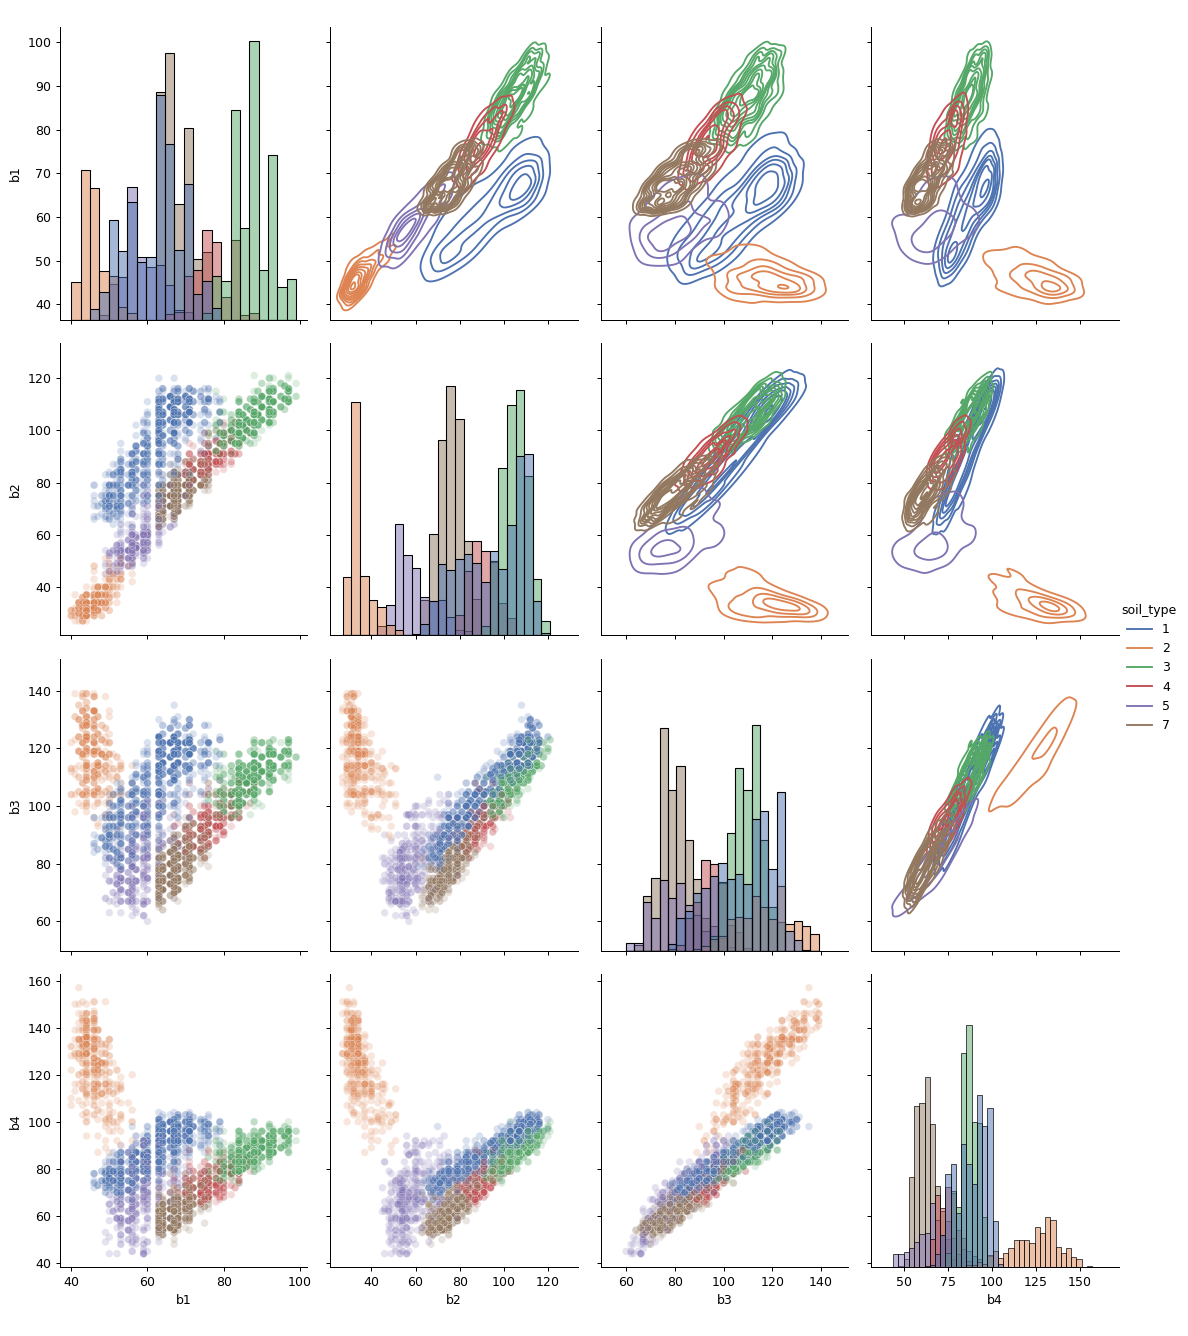

In [148]:
pg = sr.PairGrid(clean_data, hue='soil_type', diag_sharey=True,palette="deep", height=3.0 , aspect=1.2)
#pg.map(sr.scatterplot)
#pg.map_offdiag(sr.scatterplot)
pg.map_diag(sr.histplot)
pg.map_lower(sr.scatterplot, alpha=0.2)
pg.map_upper(sr.kdeplot)
#pg.map_diag(sr.boxplot)
pg.add_legend()

<IPython.core.display.Javascript object>


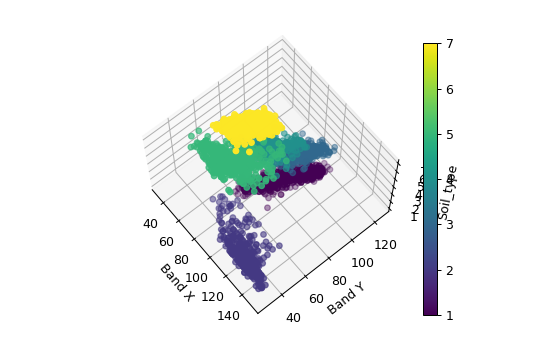

In [48]:
# 3D Plot
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
plot3d = ax.scatter3D(new.b2, new.b4, new.soil_type, c=new.soil_type)
ax.set_xlabel('Band X')
ax.set_ylabel('Band Y')
ax.set_zlabel('Soil_type')

plt.colorbar(plot3d)
# angles in degrees

# Explore Test Data

In [14]:
test_X = test_df.loc[:, 16:19]
test_Y = test_df.loc[:, 36]
test_data = pd.concat([test_X, test_Y], axis=1)
test_data.columns = ['b1', 'b2', 'b3', 'b4', 'soil_type']

In [111]:
test_data.shape

(2000, 5)

In [112]:
test_data.head()

,b1,b2,b3,b4,soil_type
0,76,103,118,88,3
1,80,107,118,88,3
2,80,95,100,78,4
3,80,95,100,78,4
4,80,91,100,78,4


In [113]:
test_data.nunique()

b1           49
b2           76
b3           75
b4           97
soil_type     6
dtype: int64

(array([461., 224.,   0., 397.,   0., 211., 237.,   0.,   0., 470.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

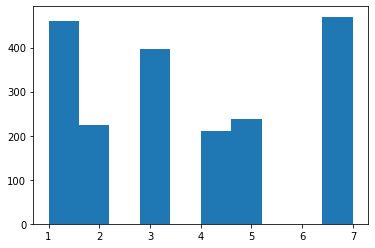

In [154]:
plt.hist(test_data.soil_type)

<IPython.core.display.Javascript object>


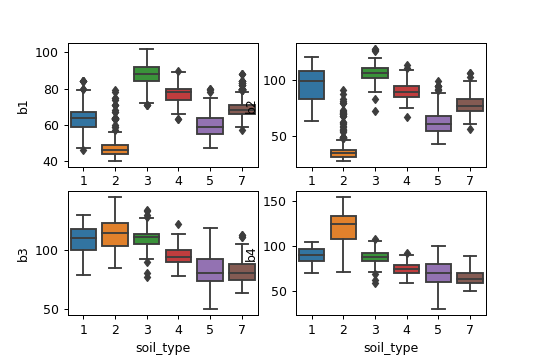

<AxesSubplot:xlabel='soil_type', ylabel='b4'>

In [114]:
fig = plt.figure()
plt.subplot(2,2, 1)
sr.boxplot(x = 'soil_type', y = 'b1', data=test_data)

plt.subplot(2, 2, 2)
sr.boxplot(x = 'soil_type', y = 'b2', data=test_data)

plt.subplot(2, 2, 3)
sr.boxplot(x = 'soil_type', y = 'b3', data=test_data)

plt.subplot(2, 2, 4)
sr.boxplot(x = 'soil_type', y = 'b4', data=test_data)

In [ ]:
### Outliers are present

<IPython.core.display.Javascript object>


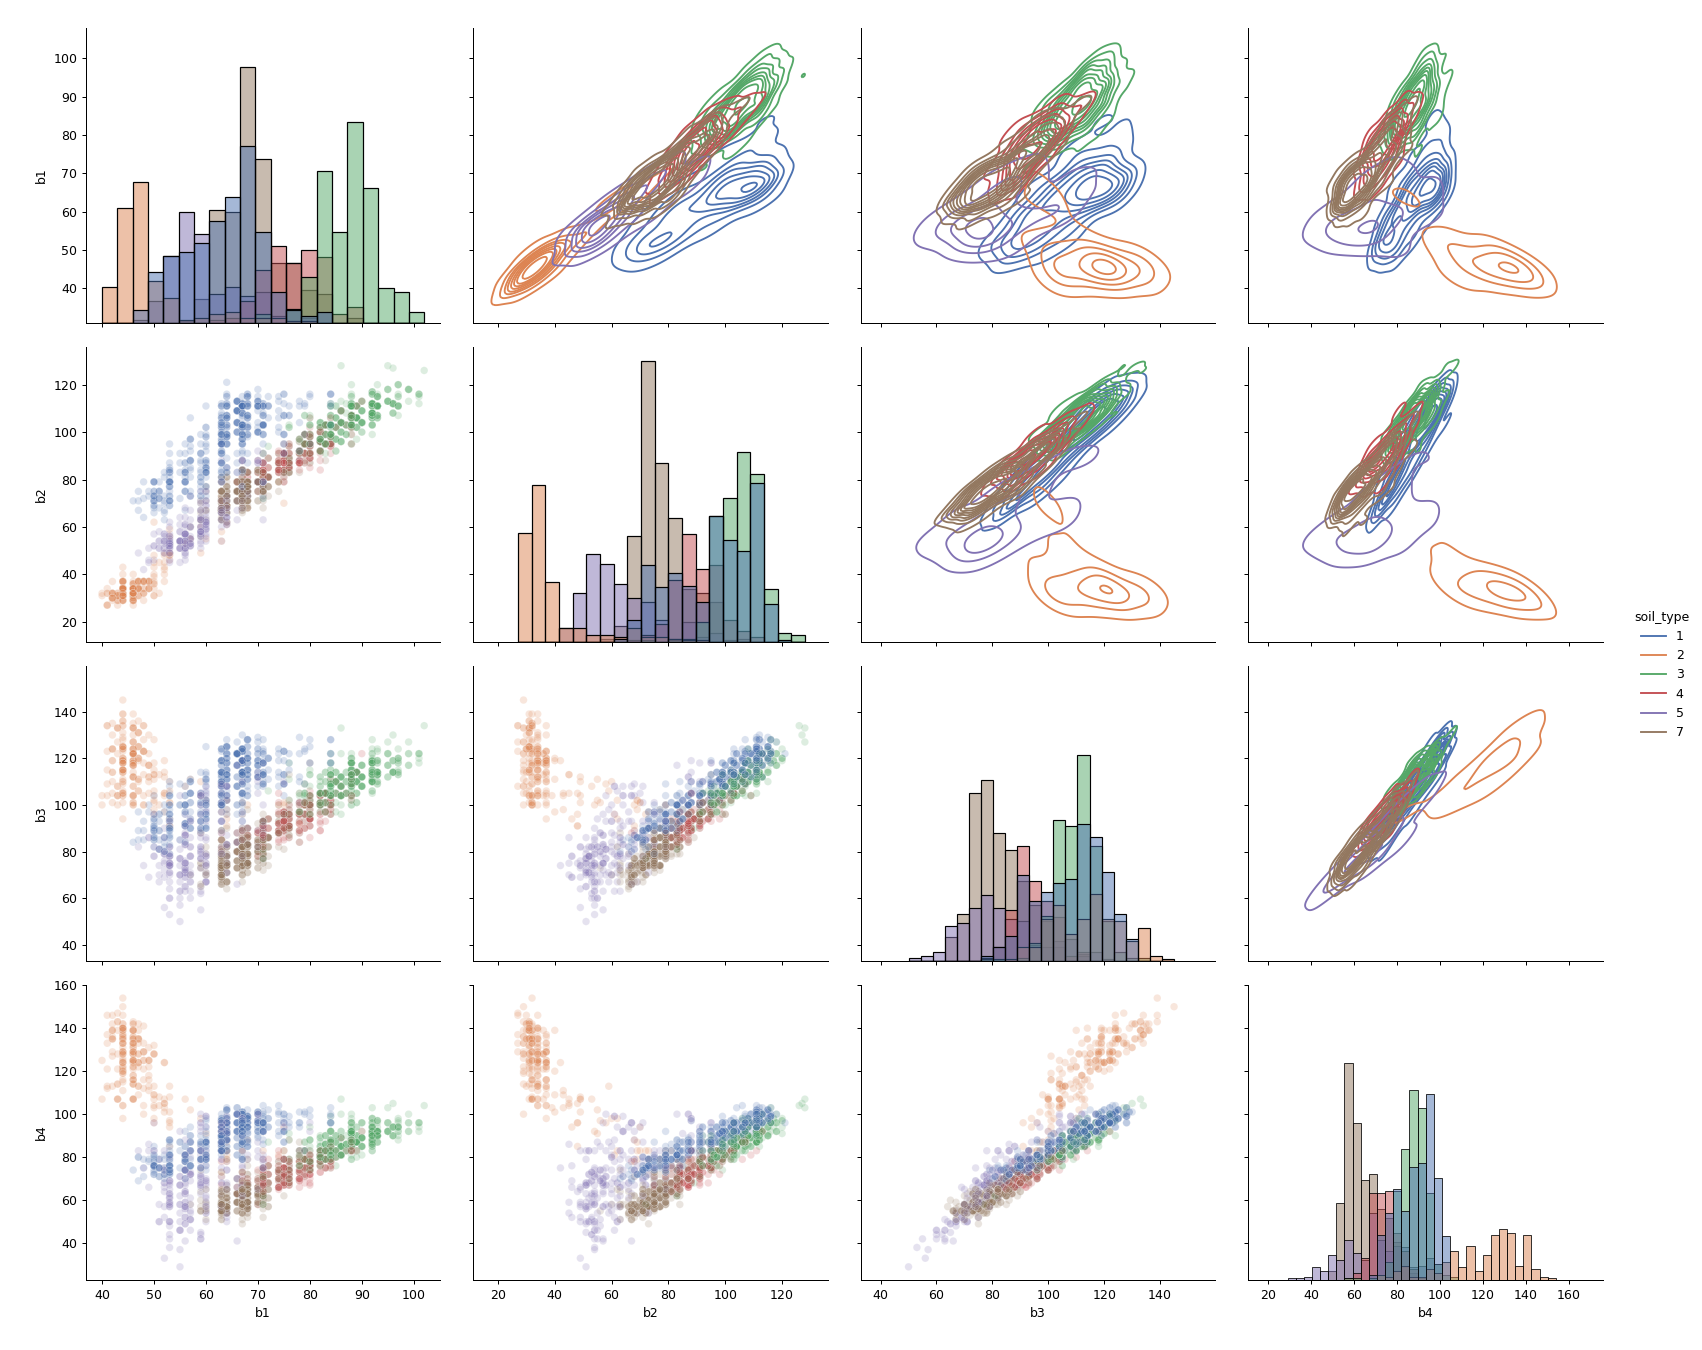

In [115]:
pg = sr.PairGrid(test_data, hue='soil_type', diag_sharey=True,palette="deep", height=3.0 , aspect=1.2)
#pg.map(sr.scatterplot)
#pg.map_offdiag(sr.scatterplot)
pg.map_diag(sr.histplot,)
pg.map_lower(sr.scatterplot, alpha=0.2)
pg.map_upper(sr.kdeplot)
#pg.map_diag(sr.boxplot)
pg.add_legend()

In [15]:
def bound(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    median = df.median()
    std_dev = df.std()
    
    lower_bound = Q1 - (1.25*IQR)
    upper_bound = Q3 + (1.0*IQR)
    
    #lower_bound = median - (2.5*std_dev)
    #upper_bound = median + (2.5*std_dev)
    
    return(lower_bound, upper_bound)

In [16]:
a,b = test_data.shape
ls_t = []
for i in range(a):
    type = test_data.iloc[i,4]
    b1 = test_data.iloc[i,0]
    b2 = test_data.iloc[i,1]
    b3 = test_data.iloc[i,2]
    b4 = test_data.iloc[i,3]
    
    l1, u1 = bound(test_data.groupby(['soil_type']).get_group(type)['b1'])
    l2, u2 = bound(test_data.groupby(['soil_type']).get_group(type)['b2'])
    l3, u3 = bound(test_data.groupby(['soil_type']).get_group(type)['b3'])
    l4, u4 = bound(test_data.groupby(['soil_type']).get_group(type)['b4'])
    
    if(b1<l1 or b2<l2 or b3 < l3 or b4<l4 or b1>u1 or b2>u2 or b3>u3 or b4>u4):
        ls_t.append(i)

In [17]:
test_data = test_data.drop(ls_t)

In [18]:
clean_test = test_data

In [19]:
clean_test.shape

(1808, 5)

<IPython.core.display.Javascript object>


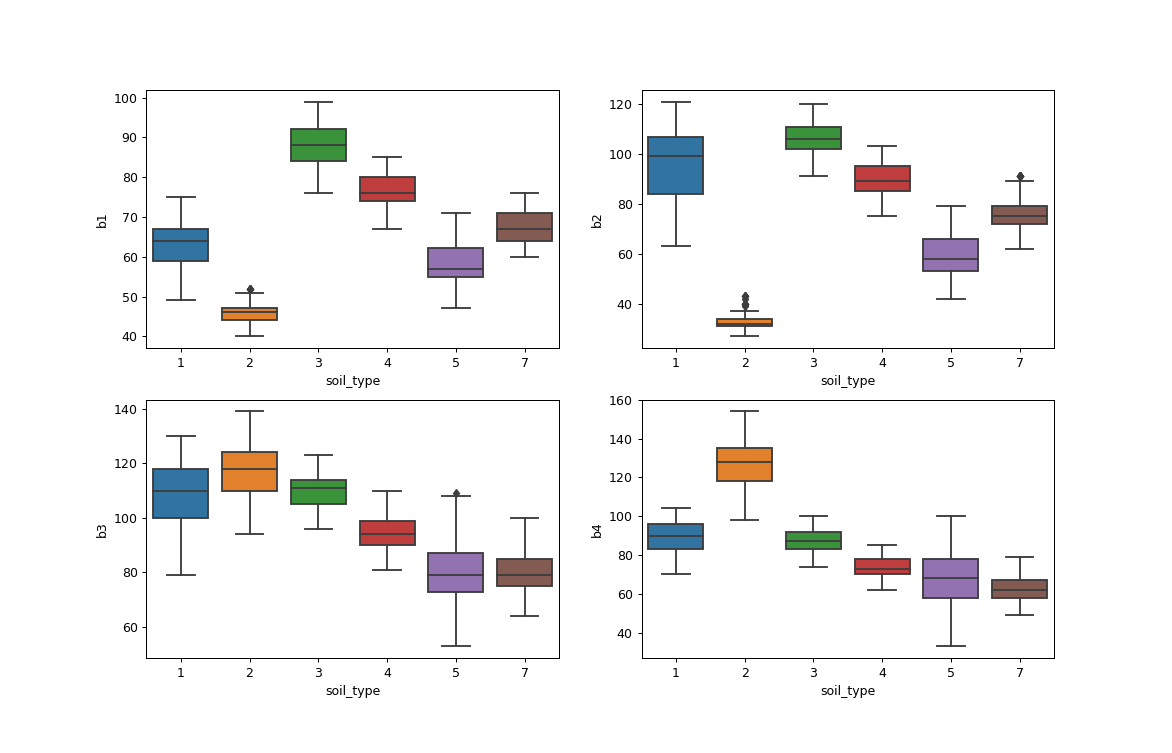

<AxesSubplot:xlabel='soil_type', ylabel='b4'>

In [79]:
fig = plt.figure()
plt.subplot(2,2, 1)
sr.boxplot(x = 'soil_type', y = 'b1', data=test_data)

plt.subplot(2, 2, 2)
sr.boxplot(x = 'soil_type', y = 'b2', data=test_data)

plt.subplot(2, 2, 3)
sr.boxplot(x = 'soil_type', y = 'b3', data=test_data)

plt.subplot(2, 2, 4)
sr.boxplot(x = 'soil_type', y = 'b4', data=test_data)

In [96]:
pg = sr.PairGrid(test_data, hue='soil_type', diag_sharey=True,palette="deep", height=3.0 , aspect=1.2)
#pg.map(sr.scatterplot)
#pg.map_offdiag(sr.scatterplot)
pg.map_diag(sr.histplot,)
pg.map_lower(sr.scatterplot, alpha=0.2)
pg.map_upper(sr.kdeplot)
#pg.map_diag(sr.boxplot)
pg.add_legend()

<IPython.core.display.Javascript object>

In [20]:
cdt = pd.DataFrame(clean_test)

#cdt.to_csv('D:\8th Sem\AI for Engieers\clean_testData.csv', index=False)

In [82]:
cdt.columns

Index(['b1', 'b2', 'b3', 'b4', 'soil_type'], dtype='object')